In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pickle
import torch
import random
import pandas as pd


In [8]:
#Set seeds to allow for reproducibility of the results
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

In [184]:
# cluster = LocalCUDACluster()
# client = Client(cluster)
# client

In [9]:
#For whole blood dataset
data = pd.read_csv("intersect_4DNFI18UHVRO.10kb.with_id.with_transcripts.erna_gene_filt.with_exp.txt", sep = "\t")

In [10]:
data

,transcript1,expression1,transcript2,expression2,dist,norm_contacts
0,ENSG00000272455,-0.028341,ENSR00000000202,-0.000818,140000,48
1,ENSG00000224051,-0.012343,ENSR00000000202,-0.000818,230000,32
2,ENSG00000224870,0.005104,ENSR00000000202,-0.000818,150000,58
3,ENSG00000197785,0.055437,ENSR00000000202,-0.000818,40000,121
4,ENSG00000272512,-0.025277,ENSR00000000202,-0.000818,560000,12
...,...,...,...,...,...,...
85625,ENSR00000144311,-0.147444,ENSG00000008735,-0.045636,26700000,1
85626,ENSR00000146851,0.470797,ENSG00000008735,-0.045636,7710000,1
85627,ENSR00000144050,-0.134191,ENSG00000008735,-0.045636,28870000,1
85628,ENSR00000146851,0.470797,ENSG00000100299,-0.279448,7720000,3


In [11]:
#Prepare training, validation, and test data
train = data[["expression1", "expression2", "dist", "norm_contacts"]]
train_features = train.copy()

##Log-normalize contact frequencies
#train_features["norm_contacts"] = np.log(train_features["norm_contacts"])

##Log1p-normalize genomic distances
#train_features["dist"] = np.log1p(train_features["dist"])

train_labels = train_features.pop("norm_contacts")
#train_features.pop("expression1")
#train_features.pop("expression2")
train_features.pop("dist")
train_labels

#train_labels = list(map(lambda x: x.replace('ad', '0'), train_labels))
#train_labels = list(map(lambda x: x.replace('scc', '1'), train_labels))

#train_labels = [int(x) for x in train_labels]
train_labels = np.array(train_labels)

train_labels

train_set_final, test_set_final, train_labels_final, test_labels_final = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)
#val_set_final, test_set_final, val_labels_final, test_labels_final = train_test_split(test_set_prelim, test_labels_prelim, test_size=0.5, random_state=42)

In [12]:
train_set_final = np.array(train_set_final)
train_set_final.shape

train_labels_final = np.array(train_labels_final)
train_labels_final.shape

(68504,)

In [155]:
# val_set_final = np.array(val_set_final)
# val_set_final.shape

# val_labels_final = np.array(val_labels_final)
# val_labels_final.shape

In [13]:
test_set_final = np.array(test_set_final)
test_set_final.shape

(17126, 2)

In [14]:
train_features = np.array(train_features)

In [15]:
# X = np.concatenate((train_set_final, val_set_final), axis=0)
# y = np.concatenate((train_labels_final, val_labels_final), axis=0)
X = train_set_final
y = train_labels_final

In [16]:
#Initialize a linear regression model and fit it to the training set
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [17]:
#Test the model using the test set
y_pred = model.predict(test_set_final)

In [19]:
#Calculare the predictive R2 of the model
r2 = r2_score(test_labels_final, y_pred)
print(f'R² Score: {r2:.5f}')

R² Score: 0.00084


In [20]:
#For cerebellum dataset
data = pd.read_csv("intersect_4DNFIWCAQUIK.10kb.with_id.with_transcripts.erna_gene_filt.with_exp.txt", sep = "\t")

In [21]:
data

,transcript1,expression1,transcript2,expression2,dist,norm_contacts
0,ENSG00000189339,-0.139152,ENSR00000249824,-0.218757,250000,1
1,ENSG00000008128,-0.007803,ENSR00000249824,-0.218757,220000,5
2,ENSR00000249824,-0.218757,ENSR00000249824,-0.218757,0,148
3,ENSG00000215915,0.020419,ENSR00000249824,-0.218757,480000,1
4,ENSG00000231050,-0.063613,ENSR00000249824,-0.218757,40000,1
...,...,...,...,...,...,...
95696,ENSG00000008735,-0.006373,ENSR00000147753,0.005671,50000,2
95697,ENSG00000100412,0.023097,ENSR00000147753,0.005671,9160000,1
95698,ENSR00000147753,0.005671,ENSG00000079974,-0.007761,110000,1
95699,ENSR00000143576,-0.130605,ENSG00000079974,-0.007761,32990000,1


In [22]:
#Prepare training, validation, and test data
train = data[["expression1", "expression2", "dist", "norm_contacts"]]
train_features = train.copy()

##Log-normalize contact frequencies
#train_features["norm_contacts"] = np.log(train_features["norm_contacts"])

##Log1p-normalize genomic distances
#train_features["dist"] = np.log1p(train_features["dist"])

train_labels = train_features.pop("norm_contacts")
#train_features.pop("expression1")
#train_features.pop("expression2")
train_features.pop("dist")
train_labels

#train_labels = list(map(lambda x: x.replace('ad', '0'), train_labels))
#train_labels = list(map(lambda x: x.replace('scc', '1'), train_labels))

#train_labels = [int(x) for x in train_labels]
train_labels = np.array(train_labels)

train_labels

train_set_final, test_set_final, train_labels_final, test_labels_final = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)
#val_set_final, test_set_final, val_labels_final, test_labels_final = train_test_split(test_set_prelim, test_labels_prelim, test_size=0.5, random_state=42)

In [23]:
train_set_final = np.array(train_set_final)
train_set_final.shape

train_labels_final = np.array(train_labels_final)
train_labels_final.shape

(76560,)

In [24]:
test_set_final = np.array(test_set_final)
test_set_final.shape

(19141, 2)

In [25]:
train_features = np.array(train_features)

In [26]:
# X = np.concatenate((train_set_final, val_set_final), axis=0)
# y = np.concatenate((train_labels_final, val_labels_final), axis=0)
X = train_set_final
y = train_labels_final

In [27]:
#Initialize a linear regression model and fit it to the training set
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [28]:
#Test the model using the test set
y_pred = model.predict(test_set_final)

In [29]:
#Calculare the predictive R2 of the model
r2 = r2_score(test_labels_final, y_pred)
print(f'R² Score: {r2:.5f}')

R² Score: 0.00003


In [201]:
#Save the model to a pickle file
with open('contact_distance_linear_regression.pkl', 'wb') as file:
    pickle.dump(model, file)

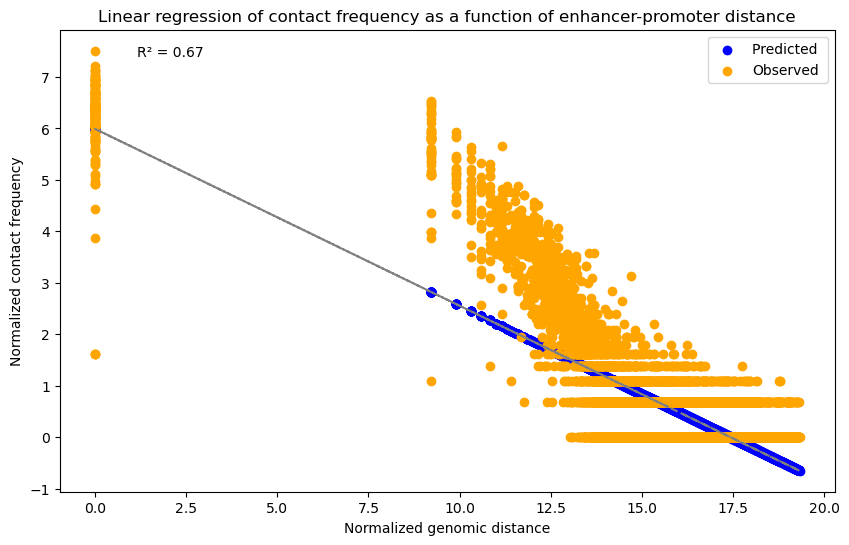

In [202]:
plt.figure(figsize=(10, 6))

# Plotting the original data points as scatter plot
plt.scatter(test_set_final, y_pred, color='blue')
plt.scatter(test_set_final, test_labels_final, color='orange')

# If you also want to plot the regression line
plt.plot(test_set_final, y_pred, color='gray', linestyle='--')

# Adding R2 to the plot
plt.text(0.10, 0.95, f'R² = {r2:.2f}', ha='left', va='center', transform=plt.gca().transAxes)

# Setting labels, title and legend
plt.xlabel('Normalized genomic distance')
plt.ylabel('Normalized contact frequency')
plt.title('Linear regression of contact frequency as a function of enhancer-promoter distance')
plt.legend(['Predicted ', 'Observed'])

# Displaying the plot
plt.show()
# plt.savefig("filename.png", dpi=300)

In [208]:
#Linear regression based only on eRNA and gene expression

#Prepare training, validation, and test data
train = data[["expression1", "expression2", "dist", "norm_contacts"]]
train_features = train.copy()

##Log-normalize contact frequencies
train_features["norm_contacts"] = np.log(train_features["norm_contacts"])

##Log1p-normalize genomic distances
train_features["dist"] = np.log1p(train_features["dist"])

train_labels = train_features.pop("norm_contacts")
#train_features.pop("erna_grex")
#train_features.pop("gene_grex")
train_features.pop("dist")
train_labels

#train_labels = list(map(lambda x: x.replace('ad', '0'), train_labels))
#train_labels = list(map(lambda x: x.replace('scc', '1'), train_labels))

#train_labels = [int(x) for x in train_labels]
train_labels = np.array(train_labels)

train_labels

train_set_final, test_set_final, train_labels_final, test_labels_final = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)
#val_set_final, test_set_final, val_labels_final, test_labels_final = train_test_split(test_set_prelim, test_labels_prelim, test_size=0.5, random_state=42)

In [209]:
train_set_final = np.array(train_set_final)
train_set_final.shape

train_labels_final = np.array(train_labels_final)
train_labels_final.shape

(68504,)

In [210]:
# val_set_final = np.array(val_set_final)
# val_set_final.shape

# val_labels_final = np.array(val_labels_final)
# val_labels_final.shape

In [211]:
test_set_final = np.array(test_set_final)
test_set_final.shape

(17126, 2)

In [212]:
train_features = np.array(train_features)

In [213]:
# X = np.concatenate((train_set_final, val_set_final), axis=0)
# y = np.concatenate((train_labels_final, val_labels_final), axis=0)

X = train_features
y = train_labels

In [214]:
#Initialize a linear regression model and fit it to the training set
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [215]:
#Test the model using the test set
y_pred = model.predict(test_set_final)

In [216]:
#Calculare the predictive R2 of the model
r2 = r2_score(test_labels_final, y_pred)
print(f'R² Score: {r2:.2f}')

R² Score: 0.00


In [219]:
#Linear regression based on both expression and distance

#Prepare training, validation, and test data
train = data[["expression1", "expression2", "dist", "norm_contacts"]]
train_features = train.copy()

##Log-normalize contact frequencies
train_features["norm_contacts"] = np.log(train_features["norm_contacts"])

##Log1p-normalize genomic distances
train_features["dist"] = np.log1p(train_features["dist"])

train_labels = train_features.pop("norm_contacts")
#train_features.pop("erna_grex")
#train_features.pop("gene_grex")
#train_features.pop("dist")
train_labels

#train_labels = list(map(lambda x: x.replace('ad', '0'), train_labels))
#train_labels = list(map(lambda x: x.replace('scc', '1'), train_labels))

#train_labels = [int(x) for x in train_labels]
train_labels = np.array(train_labels)

train_labels

train_set_final, test_set_final, train_labels_final, test_labels_final = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)
#val_set_final, test_set_final, val_labels_final, test_labels_final = train_test_split(test_set_prelim, test_labels_prelim, test_size=0.5, random_state=42)

In [220]:
train_set_final = np.array(train_set_final)
train_set_final.shape

train_labels_final = np.array(train_labels_final)
train_labels_final.shape

(68504,)

In [221]:
test_set_final = np.array(test_set_final)
test_set_final.shape

(17126, 3)

In [222]:
train_features = np.array(train_features)

In [223]:
# X = np.concatenate((train_set_final, val_set_final), axis=0)
# y = np.concatenate((train_labels_final, val_labels_final), axis=0)

X = train_features
y = train_labels

In [224]:
#Initialize a linear regression model and fit it to the training set
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [225]:
#Test the model using the test set
y_pred = model.predict(test_set_final)

In [226]:
#Calculare the predictive R2 of the model
r2 = r2_score(test_labels_final, y_pred)
print(f'R² Score: {r2:.2f}')

R² Score: 0.67
